## **Classify newswires: Multiclass Classification Problem**

**Reuters-data**

In [3]:
from keras.datasets import reuters
(train_data,train_lab),(test_data,test_lab) = reuters.load_data(num_words=10000)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [6]:
train_data.shape,test_data.shape

((8982,), (2246,))

In [8]:
word_index = reuters.get_word_index()
index_word = {v:k for k,v in word_index.items()}

In [9]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [10]:
print(' '.join([index_word.get(i-3,'?') for i in train_data[0]]))

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


## **Preparing Data**

In [15]:
import numpy as np
def encode_data(data,dim=10000): #since, max_index = 9999
  results = np.zeros((data.shape[0],dim))

  for i,x in enumerate(data):
    results[i,x] = 1

  return results

In [16]:
x_train = encode_data(train_data)
x_test = encode_data(test_data)

In [17]:
from keras.utils import to_categorical

In [18]:
y_train = to_categorical(train_lab)
y_test = to_categorical(test_lab)

## **Network Building**

In [22]:
from keras.models import Sequential
from keras.layers import Dense

In [24]:
len(np.unique(test_lab))

46

In [26]:
model = Sequential()
model.add(Dense(128,activation='relu',input_shape=(10000,))) #since, size of each vector is 10000
model.add(Dense(64,activation='relu'))
model.add(Dense(46,activation='softmax'))

In [27]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])

In [28]:
model.fit(x_train,y_train,epochs=20,batch_size=500,validation_split=0.2, verbose=1)

Epoch 1/20
15/15 [==============================] - 2s 92ms/step - loss: 3.0133 - acc: 0.4093 - val_loss: 1.5248 - val_acc: 0.6895
Epoch 2/20
15/15 [==============================] - 1s 75ms/step - loss: 1.2822 - acc: 0.7314 - val_loss: 1.1722 - val_acc: 0.7563
Epoch 3/20
15/15 [==============================] - 1s 75ms/step - loss: 0.8649 - acc: 0.8175 - val_loss: 1.0408 - val_acc: 0.7730
Epoch 4/20
15/15 [==============================] - 1s 76ms/step - loss: 0.6491 - acc: 0.8684 - val_loss: 0.9885 - val_acc: 0.7874
Epoch 5/20
15/15 [==============================] - 1s 75ms/step - loss: 0.4868 - acc: 0.9029 - val_loss: 0.9858 - val_acc: 0.7741
Epoch 6/20
15/15 [==============================] - 1s 75ms/step - loss: 0.3598 - acc: 0.9198 - val_loss: 0.9141 - val_acc: 0.8075
Epoch 7/20
15/15 [==============================] - 1s 75ms/step - loss: 0.2709 - acc: 0.9438 - val_loss: 0.9335 - val_acc: 0.7974
Epoch 8/20
15/15 [==============================] - 1s 75ms/step - loss: 0.2196 - a

In [38]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1280128   
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 46)                2990      
Total params: 1,291,374
Trainable params: 1,291,374
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.save('/content/drive/MyDrive/jupyter_notebooks/deep_learning_fc/models/model3.h5')

## **Model Evaluation**

In [30]:
dict_ = model.history.history
dict_.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [32]:
train_acc = dict_['acc']
train_loss = dict_['loss']
val_acc = dict_['val_acc']
val_loss = dict_['val_loss']
epochs = range(1,len(train_acc)+1)

**Training v/s validation**

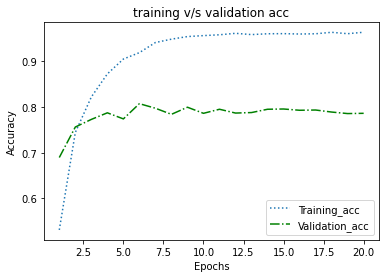

In [34]:
import matplotlib.pyplot as plt

plt.plot(epochs,train_acc,ls=':',label='Training_acc')
plt.plot(epochs,val_acc,ls='-.',color='green',label='Validation_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('training v/s validation acc')
plt.legend()


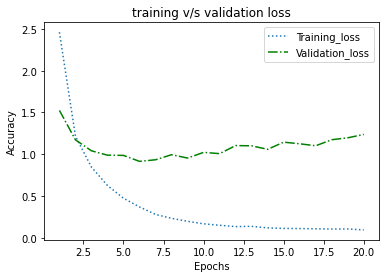

In [35]:
plt.plot(epochs,train_loss,ls=':',label='Training_loss')
plt.plot(epochs,val_loss,ls='-.',color='green',label='Validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('training v/s validation loss')
plt.legend()

**Results on test data**

**overall loss nd accuracy**

In [36]:
loss,acc = model.evaluate(x_test,y_test)

71/71 [==============================] - 0s 4ms/step - loss: 1.3063 - acc: 0.7774


In [37]:
print('Loss: ',loss)
print('Acc: ',acc)

Loss:  1.3063421249389648
Acc:  0.7773820161819458


**precision, recall and f1-score on a per-class basis**

In [39]:
from sklearn.metrics import classification_report,accuracy_score

In [42]:
preds = model.predict(x_test)
preds.shape

(2246, 46)

In [47]:
pred_lab = preds.argmax(axis=1)
pred_lab.shape,test_lab.shape

((2246,), (2246,))

In [48]:
print(classification_report(pred_lab,test_lab))

              precision    recall  f1-score   support

           0       0.50      0.86      0.63         7
           1       0.74      0.74      0.74       106
           2       0.40      0.62      0.48        13
           3       0.90      0.92      0.91       794
           4       0.90      0.75      0.82       567
           5       0.20      1.00      0.33         1
           6       0.71      0.91      0.80        11
           7       0.33      1.00      0.50         1
           8       0.71      0.64      0.67        42
           9       0.80      0.80      0.80        25
          10       0.83      0.93      0.88        27
          11       0.76      0.61      0.67       104
          12       0.23      0.60      0.33         5
          13       0.62      0.66      0.64        35
          14       0.50      1.00      0.67         1
          15       0.11      0.50      0.18         2
          16       0.78      0.57      0.66       136
          17       0.08    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
accuracy_score(pred_lab,test_lab) #same as we got usinh model.evaluate

0.7773820124666073